In [581]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy import stats

In [582]:
df = pd.read_csv("healthdata.csv")

In [583]:
def laplaceMechanism(x, epsilon):
    not_in_range = True
    while (not_in_range):
        private_val = x + np.random.laplace(0, 1/epsilon, 1)[0]
        if (private_val > 0):
            not_in_range = False
    return private_val

def gaussianMechanism(x, epsilon, delta):
    sigma = np.sqrt(2 * np.log(1.25 / delta)) * 1 / epsilon
    not_in_range = True
    while (not_in_range):
        private_val = x + np.random.normal(0, sigma, 1)[0]
        if (private_val > 0):
            not_in_range = False
    return private_val

In [584]:
def mape(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_true) * 100
def rmse(y_true, y_pred):
    return np.sqrt((y_pred - y_true)**2)

In [585]:
df = pd.read_csv("healthdata.csv")
epsilons = np.logspace(-2,1,25)
num_of_runs_for_epsilon = 500
wage_query = np.sum(df['wage'] < 13)
age_query = np.sum(df['age'] > 30)
problem_query = [
    np.sum(df['problem'] == 'breathing'),
    np.sum(df['problem'] == 'dental'),
    np.sum(df['problem'] == 'mental'),
    np.sum(df['problem'] == 'heart')
]

In [586]:
laplace_rmse = []
laplace_mape = []
for epsilon in epsilons:
    average_rmse = []
    average_mape = []
    for x in range(num_of_runs_for_epsilon):
        private_wage_query = laplaceMechanism(wage_query, epsilon)
        average_rmse.append(rmse(wage_query, private_wage_query))
        average_mape.append(mape(wage_query, private_wage_query))
    laplace_rmse.append(np.mean(average_rmse))
    laplace_mape.append(np.mean(average_mape))

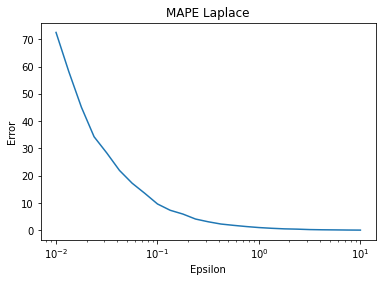

In [587]:
plt.semilogx(epsilons, laplace_rmse)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Laplace")
plt.show()

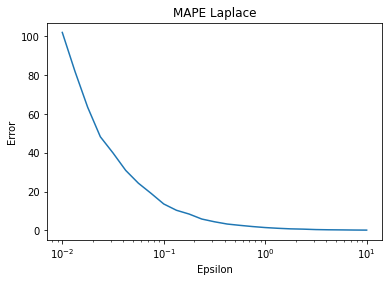

In [588]:
plt.semilogx(epsilons, laplace_mape)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Laplace")
plt.show()

In [589]:
delta_values = [1/100, 1/200, 1/1000, 1/10000]
gaussian_error = []
for delta_value in delta_values:
    gaussian_rmse = []
    gaussian_mape = []
    for epsilon in epsilons:
        average_rmse = []
        average_mape = []
        for x in range(num_of_runs_for_epsilon):
            private_wage_query = gaussianMechanism(wage_query, epsilon, delta_value)
            average_rmse.append(rmse(wage_query, private_wage_query))
            average_mape.append(mape(wage_query, private_wage_query))

        gaussian_rmse.append(np.mean(average_rmse))
        gaussian_mape.append(np.mean(average_mape))
    gaussian_error.append([gaussian_rmse, gaussian_mape])

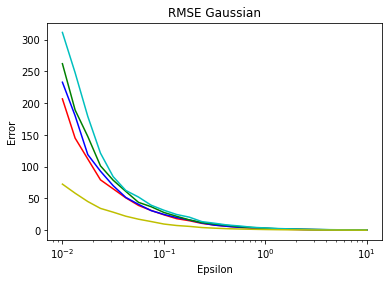

In [590]:
colors = ['r', 'b', 'g', 'c']
for idx, error in enumerate(gaussian_error):
    plt.semilogx(epsilons, error[0], colors[idx])

plt.semilogx(epsilons, laplace_rmse, 'y')
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("RMSE Gaussian")
plt.show()

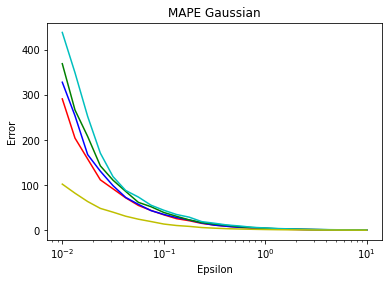

In [591]:
for idx, error in enumerate(gaussian_error):
    plt.semilogx(epsilons, error[1], colors[idx])

plt.semilogx(epsilons, laplace_mape, 'y')
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Gaussian")
plt.show()
#https://www.sciencedirect.com/science/article/pii/S0166218X1630169X
#https://desfontain.es/privacy/differential-privacy-in-practice.html

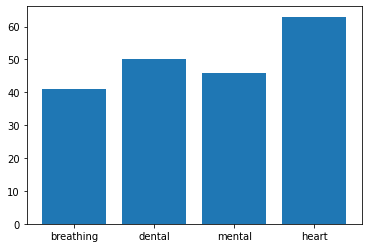

In [592]:
x = np.arange(4)
plt.bar(x, height=problem_query)
plt.xticks(x, ['breathing','dental','mental', 'heart'])
plt.show()

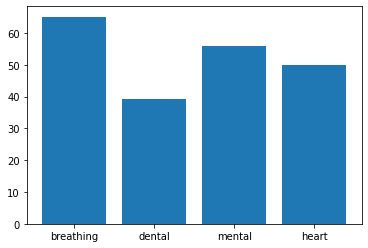

In [593]:
private_problem_query = []
for value in problem_query:
    private_problem_query.append(laplaceMechanism(value, 0.1))

plt.bar(x, height=private_problem_query)
plt.xticks(x, ['breathing','dental','mental', 'heart'])
plt.show()  